<a href="https://colab.research.google.com/github/zasminah/Python_DataVisualization/blob/main/DataVisualization_matplotlib_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

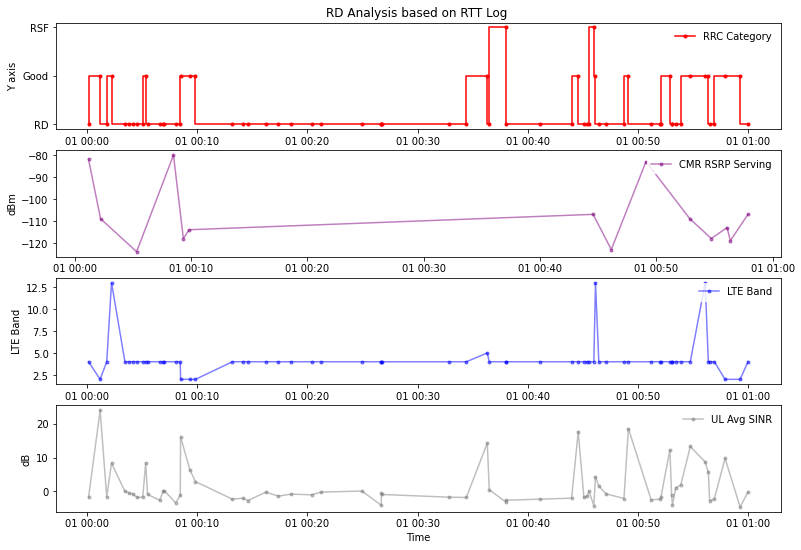

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df = pd.read_csv("./RTT_4G_Does_CA.csv")
#https://raw.githubusercontent.com/zasminah/dataset/main/RTT_4G_Does_CA.csv
df = pd.read_csv('https://raw.githubusercontent.com/zasminah/dataset/main/RTT_4G_Does_CA.csv', encoding='cp949')
# df = pd.read_csv('https://raw.githubusercontent.com/zasminah/dataset/main/RTT_4G_Does_CA.xlsx', sep= ',', header= None,skiprows=1)
# print(df.columns)

########## RD
# is_rd = df['RRC Category*'] == 'RD'
# rd = df[['Procedure End Time*','RRC Category*']][is_rd]
rd = df[['Procedure End Time*','RRC Category*']].dropna(how='any')
rd['Procedure End Time*'] = pd.to_datetime(rd['Procedure End Time*'], format = '%H:%M:%S')
RRC_CATEGORY = ["RRC Excl", "Good", "RSF", "RD"]

########## RSRP
cmrRsrp = df[['Procedure End Time*','First  CMR RSRP Serving (dBm)']].dropna(how='any')
cmrRsrp['Procedure End Time*'] = pd.to_datetime(cmrRsrp['Procedure End Time*'], format = '%H:%M:%S')

########### Band
band = df[['Procedure End Time*','Rollup Band #*']].dropna(how='any')
band['Procedure End Time*'] = pd.to_datetime(rd['Procedure End Time*'], format = '%H:%M:%S')

########### UL Avg SINR (dB)
ulSinr = df[['Procedure End Time*','UL Avg SINR (dB)']].dropna(how='any')
ulSinr['Procedure End Time*'] = pd.to_datetime(rd['Procedure End Time*'], format = '%H:%M:%S')

fig=plt.figure(figsize=(13,9))

plt.subplot(4,1,1)
plt.step(rd['Procedure End Time*'],rd['RRC Category*'],'.-',label='RRC Category',color='red')
plt.title('RD Analysis based on RTT Log ')
plt.legend(loc='upper right',edgecolor="white")
plt.ylabel('Y axis')

plt.subplot(4,1,2)
plt.plot(cmrRsrp['Procedure End Time*'],cmrRsrp['First  CMR RSRP Serving (dBm)'],'.-', label='CMR RSRP Serving',color='purple', alpha=0.5)
plt.legend(loc='upper right',edgecolor="white")
plt.ylabel('dBm')

plt.subplot(4,1,3)
plt.plot(band['Procedure End Time*'],band['Rollup Band #*'],'.-',label='LTE Band', color='blue', alpha=0.5)
plt.legend(loc='upper right',edgecolor="white")
plt.ylabel('LTE Band')

plt.subplot(4,1,4)
plt.plot(ulSinr['Procedure End Time*'],ulSinr['UL Avg SINR (dB)'],'.-', Label='UL Avg SINR',color='grey', alpha=0.5)
plt.legend(loc='upper right',edgecolor="white")
plt.ylabel('dB')
plt.xlabel('Time')

fig.savefig('DataVisualization_matplotlib_result.png')

plt.show()